<a href="https://colab.research.google.com/github/amd257/COVID-detection-using-CNNs/blob/improvements/Seq_Modelv5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Compressed Dataset file is stored at: https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0

!wget https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0

--2021-02-24 22:03:06--  https://www.dropbox.com/s/7avu1oypedrerxl/Dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7avu1oypedrerxl/Dataset.zip [following]
--2021-02-24 22:03:06--  https://www.dropbox.com/s/raw/7avu1oypedrerxl/Dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4eb9de7af162b785d8183058a8.dl.dropboxusercontent.com/cd/0/inline/BJm_JaTljWuPPTrG2dORwV7TBCxt20Z3VW6pqAPhEYiWZBjDMVwH_gyAtkDeKrh8APfPajztmnK64Q5T7gHgvQwj5QZjnNxhQVLE7AMtF7Zx1q6zVjwYZuEsR_m0CqaWTvE/file# [following]
--2021-02-24 22:03:07--  https://uc4eb9de7af162b785d8183058a8.dl.dropboxusercontent.com/cd/0/inline/BJm_JaTljWuPPTrG2dORwV7TBCxt20Z3VW6pqAPhEYiWZBjDMVwH_gyAtkDeKrh8APfPajztmnK64Q5T7gHgvQwj5QZjnNxhQVLE7AMtF7Zx1

In [5]:
!unzip /content/Dataset.zip?dl=0  #Extracting the compressed dataset

Archive:  /content/Dataset.zip?dl=0
   creating: Dataset/
   creating: Dataset/Test/
   creating: Dataset/Test/COVID/
  inflating: Dataset/Test/COVID/COVID (1001).png  
  inflating: Dataset/Test/COVID/COVID (1005).png  
  inflating: Dataset/Test/COVID/COVID (1012).png  
  inflating: Dataset/Test/COVID/COVID (1015).png  
  inflating: Dataset/Test/COVID/COVID (1019).png  
  inflating: Dataset/Test/COVID/COVID (1025).png  
  inflating: Dataset/Test/COVID/COVID (1027).png  
  inflating: Dataset/Test/COVID/COVID (1042).png  
  inflating: Dataset/Test/COVID/COVID (1043).png  
  inflating: Dataset/Test/COVID/COVID (1044).png  
  inflating: Dataset/Test/COVID/COVID (107).png  
  inflating: Dataset/Test/COVID/COVID (1073).png  
  inflating: Dataset/Test/COVID/COVID (1095).png  
  inflating: Dataset/Test/COVID/COVID (1099).png  
  inflating: Dataset/Test/COVID/COVID (113).png  
  inflating: Dataset/Test/COVID/COVID (1132).png  
  inflating: Dataset/Test/COVID/COVID (1143).png  
  inflating: Data

In [6]:
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.preprocessing import image
from keras.layers import *
from keras.models import *
import matplotlib.pyplot as plt
import numpy as np

In [7]:
train_images_path = "Dataset/Train"
validation_images_path = "Dataset/Validation"
test_images_path = "Dataset/Test"

In [13]:
#Preprocessing the training and validation datasets
'''train_ds = image_dataset_from_directory(
    directory= train_images_path,
    labels='inferred',
    label_mode='int',
    batch_size=60,
    image_size=(256, 256)) #resized all images to 256x256
validation_ds = image_dataset_from_directory(
    directory= validation_images_path,
    labels='inferred',
    label_mode='int',
    batch_size=30,
    image_size=(256, 256))'''

"train_ds = image_dataset_from_directory(\n    directory= train_images_path,\n    labels='inferred',\n    label_mode='int',\n    batch_size=60,\n    image_size=(256, 256)) #resized all images to 256x256\nvalidation_ds = image_dataset_from_directory(\n    directory= validation_images_path,\n    labels='inferred',\n    label_mode='int',\n    batch_size=30,\n    image_size=(256, 256))"

In [14]:
#CNN Based Model using Keras(Sequential Model)
#Multiple layers with different number of filters
#Layered architecture with 4 Convolutional Layers
model = Sequential()

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = 'relu',
                 input_shape =(256,256,3)
                 )) #224 is standard size, imagenet models are also trained on this size

model.add(Conv2D(64,
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25)) #to prevent overfitting

model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Conv2D(128,
                 kernel_size = (3,3), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5)) #changed dropout value from 0.25 to 0.5 to further prevent overfitting

model.add(Dense(3,activation='softmax')) #change activation function to softmax 
# output labels are [0,3), so 3 is used
#sigmoid function convert the data into probabilities for each class

#it is not binary crossentropy anymore so we sparse categorical crossentropy
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) #configure the learning process

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 254, 254, 32)      896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 252, 252, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 62, 62, 64)       

In [15]:
print(model.input.shape)

(None, 256, 256, 3)


In [16]:
#Training data augmentation and preprocessing before feeding it to the CNN model
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,  #flipping will add more variations to the data and it will help fight overfitting as welll
    )

train_generator= train_datagen.flow_from_directory(
    train_images_path,
    target_size = (256,256),
    batch_size = 60,
    class_mode = "categorical",
    shuffle = True,
    seed =40
    )

Found 3108 images belonging to 3 classes.


In [17]:
train_generator.class_indices

{'COVID': 0, 'Normal': 1, 'ViralPneumonia': 2}

In [18]:
#Validation data preprocessing before feeding it to the CNN model

validation_dataset = image.ImageDataGenerator(rescale = 1./255)

validation_generator = validation_dataset.flow_from_directory(
    validation_images_path,
    target_size = (256,256),
    batch_size = 10,
    class_mode = "categorical",
    shuffle = True,
    seed =40
    )

Found 388 images belonging to 3 classes.


In [19]:
validation_generator.class_indices

{'COVID': 0, 'Normal': 1, 'ViralPneumonia': 2}

In [20]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
print(STEP_SIZE_TRAIN)
print(STEP_SIZE_VALID)

51
38


In [21]:
history = model.fit(
    train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN, 
    epochs=25,
    validation_data = validation_generator,
    validation_steps = STEP_SIZE_VALID
    )

Epoch 1/25
51/51 [==============================] - 86s 2s/step - loss: 1.3494 - accuracy: 0.4535 - val_loss: 0.6116 - val_accuracy: 0.8263
Epoch 2/25
51/51 [==============================] - 78s 2s/step - loss: 0.6487 - accuracy: 0.6996 - val_loss: 0.9395 - val_accuracy: 0.6105
Epoch 3/25
51/51 [==============================] - 78s 2s/step - loss: 0.7313 - accuracy: 0.6894 - val_loss: 0.4373 - val_accuracy: 0.8711
Epoch 4/25
51/51 [==============================] - 79s 2s/step - loss: 0.5991 - accuracy: 0.7317 - val_loss: 0.3305 - val_accuracy: 0.9000
Epoch 5/25
51/51 [==============================] - 78s 2s/step - loss: 0.5007 - accuracy: 0.8084 - val_loss: 0.4048 - val_accuracy: 0.9079
Epoch 6/25
51/51 [==============================] - 78s 2s/step - loss: 0.4956 - accuracy: 0.8180 - val_loss: 0.2684 - val_accuracy: 0.9316
Epoch 7/25
51/51 [==============================] - 78s 2s/step - loss: 0.4487 - accuracy: 0.8281 - val_loss: 0.2892 - val_accuracy: 0.9132
Epoch 8/25
51/51 [==

In [22]:
model.save('Seq_Modelv5.h5')

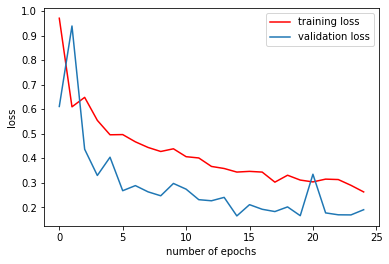

In [23]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

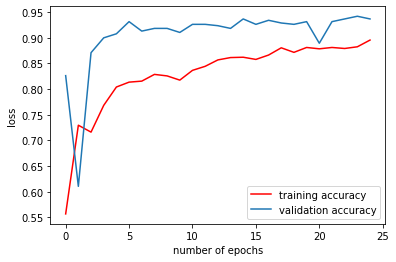

In [24]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.legend()
plt.show()